In [1]:
using Plots, LinearAlgebra, Statistics, Distributions, StatsBase, DataFrames


In [2]:
#Liczba agentów rodzaju I
Nᴵ = 5000
#Liczba agentów rodzaju II
Nᴵᴵ = 25000
#Liczba agentów rodzaju III
Nᴵᴵᴵ = 50000  #SUMA 80000 (8*10^4)
#Ceny

P_górna⁽¹⁾= 35000
P_górna⁽²⁾= 25000
P_dolna⁽¹⁾= 23000
P_górna⁽³⁾= 19000
P_dolna⁽²⁾= 18000
P_dolna⁽³⁾= 8000;

P_górna⁽¹⁾= P_górna⁽¹⁾/1000
P_górna⁽²⁾= P_górna⁽²⁾/1000
P_dolna⁽¹⁾= P_dolna⁽¹⁾/1000
P_górna⁽³⁾= P_górna⁽³⁾/1000
P_dolna⁽²⁾= P_dolna⁽²⁾/1000
P_dolna⁽³⁾= P_dolna⁽³⁾/1000

T = 12*20 #12 miesięcy - rok, 20 lat
CZAS = 15*12 #Piętnastoletnie ,,pożyczki" - zablokowanie czasu do szukania nowego mieszkania (można szukać tylko gdy CZASₙ = 0);
#Początkowe rozmieszczenie - przestrzenie trzech dzielnic: ciągłe
α₁ = 1 #Współczynnik kształtu - im większy tym ,,chudszy" ogon rozkładu PAreta
θ₁ = 0.1 #Skala - dla rozkładów Pareta x > θ (śmieszny błąd Julii - to co jest przed nawiasem to ,,vartheta", ale w komentarzach pojawia się również gdy wpiszemy \theta+TAB)
α₂ = 2
θ₂ = 0.1
α₃ = 5
θ₃ = 0.1

Pocz_rozk_I = Pareto(α₁, θ₁)
Pocz_rozk_II = Pareto(α₂, θ₂)
Pocz_rozk_III = Pareto(α₃, θ₃)
AGENCI = zeros(Nᴵ+Nᴵᴵ+Nᴵᴵᴵ,1,1,1,1,T)
AGENCI[1,1,1,1,1,1]

#Początkowe rozmieszczenie - przestrzenie trzech dzielnic: ciągłe
α₁ = 1 #Współczynnik kształtu - im większy tym ,,chudszy" ogon rozkładu PAreta
θ₁ = 0.1 #Skala - dla rozkładów Pareta x > θ (śmieszny błąd Julii - to co jest przed nawiasem to ,,vartheta", ale w komentarzach pojawia się również gdy wpiszemy \theta+TAB)
α₂ = 2
θ₂ = 0.1
α₃ = 5
θ₃ = 0.1

Pocz_rozk_I = Pareto(α₁, θ₁)
Pocz_rozk_II = Pareto(α₂, θ₂)
Pocz_rozk_III = Pareto(α₃, θ₃)
AGENCI = zeros(Nᴵ+Nᴵᴵ+Nᴵᴵᴵ,5,T) #[INDEKS AGENTA, [DZIELNICA,DOCHÓD,PIERWSZA WSPÓŁRZĘDNA,DRUGA WSPÓŁRZĘDNA,CZAS TRWANIA DŁUGU],T]

for n in 1:Nᴵ
     while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽¹⁾ || AGENCI[n,2,1] < P_dolna⁽¹⁾
        AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽¹⁾*5 #MOŻE TO BYĆ INNY MNOŻNIK, ALE SAMO P_górna MOŻE ZABRAĆ                                                                                                #WIĘCEJ CZASU
    end
    AGENCI[n,1,1:2] .= 1
    AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
    AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
end
 
for n in Nᴵ+1:Nᴵ+Nᴵᴵ
    while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽²⁾ || AGENCI[n,2,1] < P_dolna⁽²⁾
        AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽²⁾*5
    end
    AGENCI[n,1,1:2] .= 2
    AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
    AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
end
 
for n in Nᴵ+Nᴵᴵ+1:Nᴵ+Nᴵᴵ+Nᴵᴵᴵ
    while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽³⁾ || AGENCI[n,2,1] < P_dolna⁽³⁾
        AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽³⁾*5
    end
    AGENCI[n,1,1:2] .= 3
    AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
    AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
end

#ILU AGENTÓW MA POCZĄTKOWO NIEZEROWY DŁUG (SPŁATY POZA MODELEM)?
Nᵖᵒᶜᶻᵈᵍ = 15000
X = rand(1:Nᴵ + Nᴵᴵ + Nᴵᴵᴵ,Nᵖᵒᶜᶻᵈᵍ)
for m in 1:Nᵖᵒᶜᶻᵈᵍ
    AGENCI[X[m],5,1] =  rand(1:CZAS) #LOSOWA ZAPADALNOŚĆ DŁUGU - TUTAJ JEST TO LICZBA MIESIĘCY OD ZACIĄGNIĘCIA
    if AGENCI[X[m],5,1] == CZAS
        AGENCI[X[m],5,2] = 0
    else
        AGENCI[X[m],5,2] = AGENCI[X[m],5,1] + 1
    end
end

AGENCI
1. wymiar - nr agenta
2. wymiar
    * 1 kolumna - dzielnica
    * 2 kolumna - majątek
    * 3 kolumna - cena mieszkanie
    * 4 kolumna - wiek
    * 5 kolumna - dlug
3. wymiary - czas

In [3]:

@time begin
    for t in 2:T-1
        #WZROST/WAHANIA CEN?
        for n in 1:Nᴵ + Nᴵᴵ + Nᴵᴵᴵ
            # if n != 1
            #     continue
            # end 
            # Czy jestem w dzielnicy 3?
            if AGENCI[n,1,t] == 3
                przyrost = rand(Pocz_rozk_III)*P_górna⁽³⁾
                while przyrost > P_górna⁽³⁾
                    przyrost = rand(Pocz_rozk_III)*P_górna⁽³⁾
                end
                #Zwiększanie majątku
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                #Jeżeli mój majątek wzrósł i nie mam długu
                if AGENCI[n,2,t] > AGENCI[n,2,t-1] && AGENCI[n,5,t] == 0
                   #Szukamy lepszego miejsca
                   #Jeżeli mieszkam w domu kwalifikującym mnie do dzielnicy 3
                    if AGENCI[n,3,t] < P_dolna⁽²⁾ 
                        # print("3.1")
                        #Losujemy jakiś do z dzielnicy 3
                        próba = rand(truncated(Pocz_rozk_III; lower=P_dolna⁽³⁾, upper=P_górna⁽³⁾))
                        AGENCI[n,1,t+1] = 3
                        # Jeżeli móju majątek jest większy niż cena domu, a dom droższy od aktualnego
                        # to go kupuje i losujemy lokalizacje
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1 # Zakup skutkuje długiem
                        else
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0 #Spłata długu?
                        end
                    #Jeśli mój majątek umożliwia mi przeniesienie się do dzielnicy wyżej
                    else
                        # print("3.2")
                         #Losujemy jakiś do z dzielnicy 2 (ale nie droższy niż najdroższy z 3)
                        próba = rand(truncated(Pocz_rozk_III; lower=P_dolna⁽²⁾, upper=P_górna⁽³⁾))
                        # Jeżeli móju majątek jest większy niż cena domu, a dom droższy od aktualnego
                        # to go kupuje i losujemy lokalizacje
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 2
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1 # Zakup skutkuje długiem
                        else
                            AGENCI[n,1,t+1] = 3
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0 #Spłata długu?
                        end
                    end
                 # Jeśli mój majątek "spadł" lub miałem dług to:
                else
                    # print("3.3")
                    AGENCI[n,1,t+1] = 3
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    # Jak długu nie miałem to nic się nie dzieje
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    # W przeciwym wypadku mój dług rośnie
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
            elseif AGENCI[n,1,t] == 2
                przyrost = rand(Pocz_rozk_II)*P_górna⁽²⁾
                while przyrost > P_górna⁽²⁾
                    przyrost = rand(Pocz_rozk_II)*P_górna⁽²⁾
                end
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                if AGENCI[n,2,t] > AGENCI[n,2,t-1]
                   #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    if AGENCI[n,3,t] < P_dolna⁽²⁾
                        # print("2.1")
                        próba = rand(truncated(Pocz_rozk_II; lower=P_dolna⁽²⁾, upper=P_górna⁽²⁾))
                        AGENCI[n,1,t+1] = 2
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 2 # to musialem dodać
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1
                        else
                            AGENCI[n,1,t+1] = 2 # to musialem dodać
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    else
                        # print("2.2")
                        próba = rand(truncated(Pocz_rozk_II; lower=P_dolna⁽¹⁾, upper=P_górna⁽²⁾))
                         if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 1
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1
                        else
                            AGENCI[n,1,t+1] = 2
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    end
                else
                    # print("2.3")
                    AGENCI[n,1,t+1] = 3
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
            else
                przyrost = rand(Pocz_rozk_I)*P_górna⁽¹⁾
                while przyrost > P_górna⁽¹⁾
                    przyrost = rand(Pocz_rozk_I)*P_górna⁽¹⁾
                end
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                if AGENCI[n,2,t] > AGENCI[n,2,t-1]
                    # print("1.1")
                   #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    próba = rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
                    if AGENCI[n,3,t] < próba && AGENCI[n,2,t] > próba
                        # próba = rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
                        AGENCI[n,1,t+1] = 1
                        AGENCI[n,3,t+1] = próba
                        AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                        AGENCI[n,5,t+1] = 1
                    else
                        AGENCI[n,1,t+1] = 1
                        AGENCI[n,3,t+1] = AGENCI[n,3,t]
                        AGENCI[n,4,t+1] = AGENCI[n,4,t]
                        AGENCI[n,5,t+1] = 0
                    end
                else
                    # print("1.2")
                    AGENCI[n,1,t+1] = 1
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
            end 
        end
    end
end



 36.092896 seconds (334.57 M allocations: 6.022 GiB, 3.26% gc time, 0.75% compilation time)


In [19]:
# using XLSX
# XLSX.writetable("agent_example3.xlsx", DataFrame(AGENCI[1,:,:], :auto))


rand(truncated(Pocz_rozk_III; lower=P_dolna⁽³⁾, upper=P_górna⁽³⁾))
rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
rand(truncated(Pocz_rozk_II; lower=P_dolna⁽²⁾, upper=P_górna⁽²⁾))
rand()

0.8547232493936172

In [58]:
dzielnice_counts_df = DataFrame()

for t in 1:T
    to_count = string.(AGENCI[:,1:1,t])
    counts = countmap(to_count)
    # print(t)
    for key in ["1.0", "2.0", "3.0"]
        if !(key in keys(counts))
            counts[key] = 0
        end 
    end
    if t == 1
        dzielnice_counts_df = DataFrame(counts)
    else
        tmp_df = DataFrame(copy(counts))
        dzielnice_counts_df = vcat(dzielnice_counts_df,tmp_df)
    end
end

dzielnice_counts_df[!,:RowSum] = [sum(row) for row in eachrow(dzielnice_counts_df)];

rename!(dzielnice_counts_df, Dict(:1 => :district_1))
rename!(dzielnice_counts_df, Dict(:2 => :district_2))
rename!(dzielnice_counts_df, Dict(:3 => :district_3))

Row,district_1,district_2,district_3,RowSum
,Int64,Int64,Int64,Int64
1,5000,25000,50000,80000
2,5000,25000,50000,80000
3,16782,13436,49782,80000
4,28505,1782,49713,80000
5,29585,730,49685,80000
6,29752,588,49660,80000
7,29875,476,49649,80000
8,29977,383,49640,80000
9,30031,339,49630,80000


In [61]:
import Pkg; Pkg.add("Tables")
using Tables

counts = [countmap(string.(AGENCI[:, 1, t])) for t in 1:T]
for count in counts
    for key in ["1.0", "2.0", "3.0"]
        get!(count, key, 0)
    end
end

dzielnice_counts_df = vcat(DataFrame.(counts)...)
transform!(dzielnice_counts_df, AsTable(🙂 => ByRow(sum) => :RowSum)

rename!(dzielnice_counts_df, Dict(:1.0 => :district_1, :2.0 => :district_2, :3.0 => :district_3))

   Resolving package versions...
  No Changes to `C:\Users\rados\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\rados\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ? Symbolics


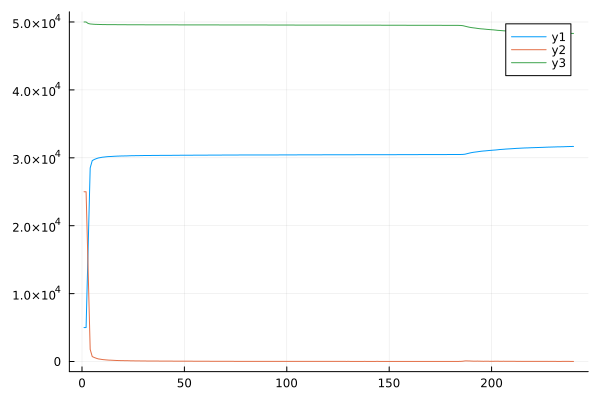

In [45]:
# using XLSX
# XLSX.writetable("agent_example_5.xlsx", DataFrame(transpose(AGENCI[(AGENCI[:,1,3] .== 0.0),:,1:10][1,:,:]), :auto))

plot(dzielnice_counts_df."district_1")
plot!(dzielnice_counts_df."district_2")
plot!(dzielnice_counts_df."district_3")
# AGENCI[(AGENCI[:,1,3] .== 0.0),:,1:10][1,:,:]

In [57]:

# Apply the function to add a new column with log returns

function percent_change!(df::DataFrame, column::String)
    df[!, Symbol(string(column, "_pct"))] = [missing; diff(df[!, column])./ df[1:end-1, column]]
end

function add_log_returns!(df::DataFrame, column::String)
    df[!, Symbol(string(column, "_logpct"))] = [missing; diff(log.(df[!, column]))]
end


# Apply the function to add a new column with percent change and log returns
for col in names(dzielnice_counts_df)
    percent_change!(dzielnice_counts_df, col)
    add_log_returns!(dzielnice_counts_df, col)
end



DomainError: DomainError with -0.46256:
log was called with a negative real argument but will only return a complex result if called with a complex argument. Try log(Complex(x)).

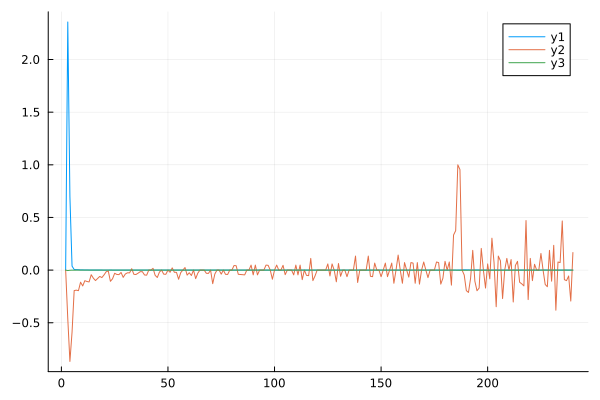

In [54]:
plot(dzielnice_counts_df."district_1_pct")
plot!(dzielnice_counts_df."district_2_pct")
plot!(dzielnice_counts_df."district_3_pct")

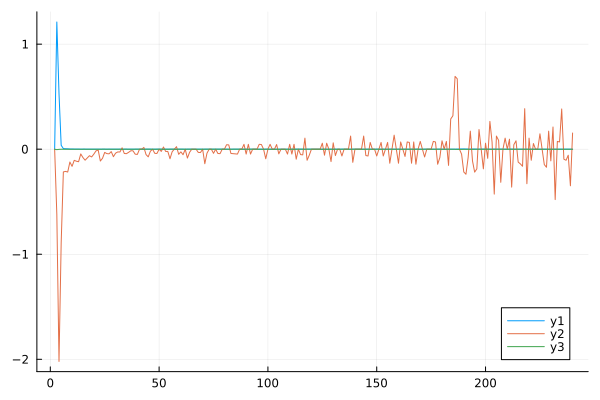

In [56]:
plot(dzielnice_counts_df."district_1_logpct")
plot!(dzielnice_counts_df."district_2_logpct")
plot!(dzielnice_counts_df."district_3_logpct")

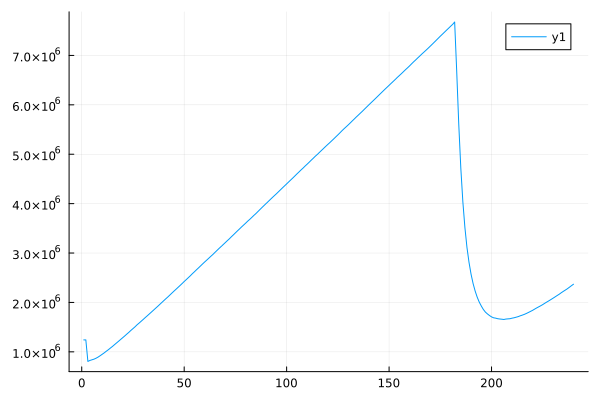

In [27]:

#WTFy xD - bedzie trzeba to zbadać
CZAS_SUMS = sum(AGENCI[:,5,:], dims = 1);
dlug_df = DataFrame(transpose(CZAS_SUMS), :auto)
plot(dlug_df.x1)